In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
    e3t_0=mesh.variables['e3t_0'][:,:,:,:]
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestAll/'

In [4]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])
fD=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia1_T*.nc')[0])
fD2=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia2_T*.nc')[0])

In [5]:
len(np.shape(fP.variables['PRD_NH4']))

4

In [6]:
len(np.shape(fD.variables['BFX_PON']))

3

In [7]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds',
            'depthu', 'depthu_bounds','depthv', 'depthv_bounds','depthw', 'depthw_bounds',
            'layer6m_W', 'layer6m_W_bounds')
def checkall(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            if len(np.shape(ff.variables[var]))==4:
                print(var,':',np.min(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])),
                      np.max(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])))
            elif len(np.shape(ff.variables[var]))==3:
                print(var,':',np.min(np.ma.masked_where(tmask[0,:,:]==0,ff.variables[var][-1,:,:])),
                      np.max(np.ma.masked_where(tmask[0,:,:]==0,fD.variables[var][-1,:,:])))
            else: 
                print('unknown shape: ',var,len(np.shape(ff.variables[var])))

In [8]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds',
            'depthu', 'depthu_bounds','depthv', 'depthv_bounds','depthw', 'depthw_bounds',
           'layer6m_W', 'layer6m_W_bounds')
def checkallSlice(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            print(var,':',np.min(ff.variables[var][-1,:,:,:]),
                      np.max(ff.variables[var][-1,:,:,:]))

In [9]:
checkall(fP)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'NO3RAD', 'RIV_NO3', 'RIV_NH4', 'REM_NO3', 'REM_PON', 'REM_DON', 'PRD_NO3', 'PRD_NH4', 'REFRN'])
Min/Max:
NO3RAD : 0.0 0.0013451242
RIV_NO3 : 0.0 10410.278
RIV_NH4 : 0.0 5788.9
REM_NO3 : 0.0 9.581778
REM_PON : -6.7637277 -0.0
REM_DON : -12.00917 -0.0
PRD_NO3 : -21.759218 -0.0
PRD_NH4 : -5.907855 -0.0
REFRN : -3.967493e-05 1.5560309e-21


In [10]:
checkall(fD)

fP.variables.keys(): dict_keys(['nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 'deptht', 'deptht_bounds', 'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATF_NO3', 'ATF_NH4', 'ATF_DON', 'ATF_PON', 'ATF_LIV', 'BFX_PON', 'BFX_DIAT'])
Min/Max:
ATF_NO3 : -2.4161732 2.0754504
ATF_NH4 : -0.56770843 1.7759498
ATF_DON : -0.47563046 0.85519034
ATF_PON : -3.6197355 2.9023535
ATF_LIV : -4.230829 3.2096367
BFX_PON : -0.00018893112 -0.0
BFX_DIAT : -2.2604485e-05 -0.0


In [11]:
checkall(fD2)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'PHS_NO3', 'PHS_NH4', 'PHS_DON', 'PHS_PON', 'PHS_LIV', 'SMS_NO3', 'SMS_NH4', 'SMS_DON', 'SMS_PON', 'SMS_LIV'])
Min/Max:
PHS_NO3 : -437.6063 383.81223
PHS_NH4 : -61.002792 64.72221
PHS_DON : -48.269497 59.22118
PHS_PON : -30.01169 36.59474
PHS_LIV : -78.68599 80.143776
SMS_NO3 : -21.748274 9.581778
SMS_NH4 : -5.115639 16.001923
SMS_DON : -4.2821913 7.722708
SMS_PON : -6.4425325 11.967412
SMS_LIV : -39.890717 17.814753


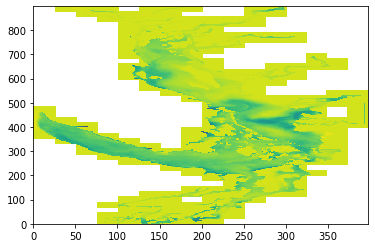

In [12]:
plt.pcolormesh(fD.variables['ATF_NH4'][0,0,:,:])

In [13]:
afiltSum=np.sum(np.sum(np.sum(tmaskSOG*(fD.variables['ATF_NO3'][:,:,:,:]+fD.variables['ATF_NH4']+\
            fD.variables['ATF_PON']+fD.variables['ATF_DON']+fD.variables['ATF_LIV']),3),2),1)

In [14]:
afiltSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_NO3'][:,:,:,:],3),2),1)
afiltSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_NH4'],3),2),1)
afiltSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_PON'],3),2),1)
afiltSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_DON'],3),2),1)
afiltSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD.variables['ATF_LIV'],3),2),1)

In [15]:
smsSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_NO3'],3),2),1)
smsSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_NH4'],3),2),1)
smsSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_PON'],3),2),1)
smsSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_DON'],3),2),1)
smsSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['SMS_LIV'],3),2),1)

In [16]:
phsSumNO3=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_NO3'],3),2),1)
phsSumNH4=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_NH4'],3),2),1)
phsSumPON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_PON'],3),2),1)
phsSumDON=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_DON'],3),2),1)
phsSumLiv=np.sum(np.sum(np.sum(tmaskSOG*fD2.variables['PHS_LIV'],3),2),1)

In [17]:
np.shape(e1t)

(1, 1, 898, 398)

In [18]:
bfxSumPON=np.sum(np.sum(tmaskSOG[:,0,:,:]*e1t[:,0,:,:]*e2t[:,0,:,:]*fD.variables['BFX_PON'],2),1)
bfxSumDIAT=np.sum(np.sum(tmaskSOG[:,0,:,:]*e1t[:,0,:,:]*e2t[:,0,:,:]*fD.variables['BFX_DIAT'],2),1)

In [19]:
smsSumNO3

array([ -651509.25,  -991791.3 , -1095664.4 ,  -974038.5 ,  -697777.1 ],
      dtype=float32)

In [20]:
smsSumNH4

array([ -28755.99 , -119186.74 , -135285.81 ,  -95196.27 ,   20955.695],
      dtype=float32)

In [21]:
smsSumPON

array([274300.03, 321088.3 , 374846.  , 416956.62, 425624.8 ],
      dtype=float32)

In [22]:
smsSumDON

array([ 89240.414, 133079.6  , 184020.39 , 222727.19 , 234074.89 ],
      dtype=float32)

In [23]:
afiltSumNO3

masked_array(data=[-72447.953125, -110218.71875, -121727.296875,
                   -108173.546875, -77526.484375],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [24]:
afiltSumNH4

array([ -3201.86 , -13241.208, -15029.483, -10568.15 ,   2333.374],
      dtype=float32)

In [25]:
afiltSumPON

array([ -604.2715,  4801.708 ,  9623.818 , 13123.984 , 13034.92  ],
      dtype=float32)

In [26]:
afiltSumDON

array([ 9921.484, 14790.714, 20447.656, 24746.123, 26010.695],
      dtype=float32)

In [27]:
afiltSumLiv

array([32428.445 , 70029.3   , 71481.13  , 44253.863 , -1614.6895],
      dtype=float32)

In [28]:
nitrSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['REM_NO3'][:,:,:,:],3),2),1)

In [29]:
PPNO3Sum=-1*np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['PRD_NO3'][:,:,:,:]),3),2),1)
PPNH4Sum=-1*np.sum(np.sum(np.sum(tmaskSOG*fP.variables['PRD_NH4'][:,:,:,:],3),2),1)

In [30]:
REFRNSum=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['REFRN'][:,:,:,:]),3),2),1)

In [31]:
remSum=-1*np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['REM_DON'][:,:,:,:]+fP.variables['REM_PON'][:,:,:,:]),3),2),1)

In [32]:
rivSum=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['RIV_NO3'][:,:,:,:]+fP.variables['RIV_NH4'][:,:,:,:]),3),2),1)

In [33]:
rivSumNO3=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['RIV_NO3'][:,:,:,:]),3),2),1)

In [34]:
rivSumNH4=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['RIV_NH4'][:,:,:,:]),3),2),1)

In [35]:
fS=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_snp_T_20150501-20150505.nc')

In [36]:
checkall(fS)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_instant', 'time_instant_bounds', 'time_counter', 'time_counter_bounds', 'NO3_E3TSNAP', 'NH4_E3TSNAP', 'PON_E3TSNAP', 'DON_E3TSNAP', 'LIV_E3TSNAP'])
Min/Max:
unknown shape:  time_instant 1
unknown shape:  time_instant_bounds 2
NO3_E3TSNAP : 0.0 962.8308
NH4_E3TSNAP : 0.0 75.641525
PON_E3TSNAP : 0.0 28.147413
DON_E3TSNAP : 0.0 51.221718
LIV_E3TSNAP : 0.0 69.579895


In [37]:
fS.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_instant', 'time_instant_bounds', 'time_counter', 'time_counter_bounds', 'NO3_E3TSNAP', 'NH4_E3TSNAP', 'PON_E3TSNAP', 'DON_E3TSNAP', 'LIV_E3TSNAP'])

In [38]:
no3Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1)
nh4Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['NH4_E3TSNAP'][:,:,:,:],3),2),1)
ponSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['PON_E3TSNAP'][:,:,:,:],3),2),1)
donSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['DON_E3TSNAP'][:,:,:,:],3),2),1)
livSum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fS.variables['LIV_E3TSNAP'][:,:,:,:],3),2),1)

In [39]:
no3Sum

masked_array(data=[32694817804470.977, 32619731220009.46,
                   32517570404128.055, 32435476818482.812,
                   32366801931905.098],
             mask=[False, False, False, False, False],
       fill_value=1e+20)

In [40]:
livSum

masked_array(data=[980941672636.5259, 1028809564482.9664,
                   1078850954342.7689, 1099359644061.9604,
                   1074207338419.0791],
             mask=[False, False, False, False, False],
       fill_value=1e+20)

In [41]:
no3diff=(no3Sum[1:]-no3Sum[:-1])/(24*3600)
nh4diff=(nh4Sum[1:]-nh4Sum[:-1])/(24*3600)
pondiff=(ponSum[1:]-ponSum[:-1])/(24*3600)
dondiff=(donSum[1:]-donSum[:-1])/(24*3600)
livdiff=(livSum[1:]-livSum[:-1])/(24*3600)

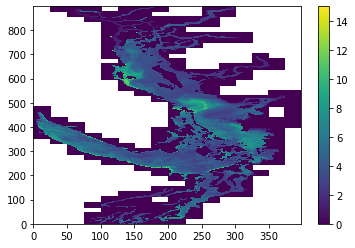

In [42]:
plt.pcolormesh(fS.variables['LIV_E3TSNAP'][0,0,:,:])
plt.colorbar()

In [43]:
phsSumNO3

array([1494450.5  ,  234720.47 ,   36879.375,  133974.53 ,  -18709.094],
      dtype=float32)

In [44]:
smsSumNO3

array([ -651509.25,  -991791.3 , -1095664.4 ,  -974038.5 ,  -697777.1 ],
      dtype=float32)

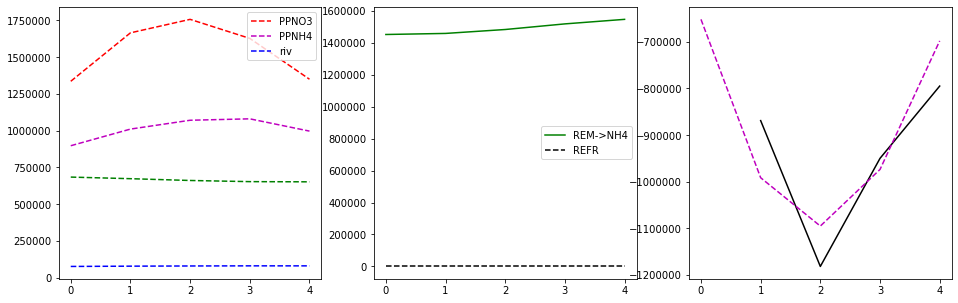

In [67]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
#ax[0].plot(range(0,5),afiltSum,'k-',label='afilt')
ax[0].plot(range(0,5),PPNO3Sum,'r--',label='PPNO3')
ax[0].plot(range(0,5),PPNH4Sum,'m--',label='PPNH4')
ax[0].plot(range(0,5),rivSum,'b--',label='riv')
ax[0].legend()
ax[1].plot(range(0,5),remSum,'g-',label='REM->NH4')
ax[1].plot(range(0,5),REFRNSum,'k--',label='REFR')
ax[0].plot(range(0,5),nitrSum,'g--',label='nitr')
#ax[1].plot(range(0,5),afiltSum,'y--',label='afilt')
#ax[1].plot(range(0,5),nitrSum-PPSum,'m--',label='bio')
#ax[1].plot(range(0,5),physSum+nitrSum-PPSum+rivSum,'c--',label='phys+bio+riv')
#ax[1].plot(range(0,5),bioSum,'k-',label='bio')
#ax[1].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[1].legend()
ax[2].plot(range(1,5),no3diff,'k-',label='NO3 diff')
ax[2].plot(range(0,5),smsSumNO3,'m--',label='NO3 sms')
#ax[2].plot(range(0,5),phsSumNO3+smsSumNO3,'r--',label='NO3 sms+phys')
#ax[2].plot(range(1,5),livdiff,'k-',label='liv diff')
#ax[2].plot(range(0,5),phsSumLiv+smsSumLiv,'r--',label='liv sms+phys')
#ax[2].legend()

Text(0.5, 1.0, 'DON')

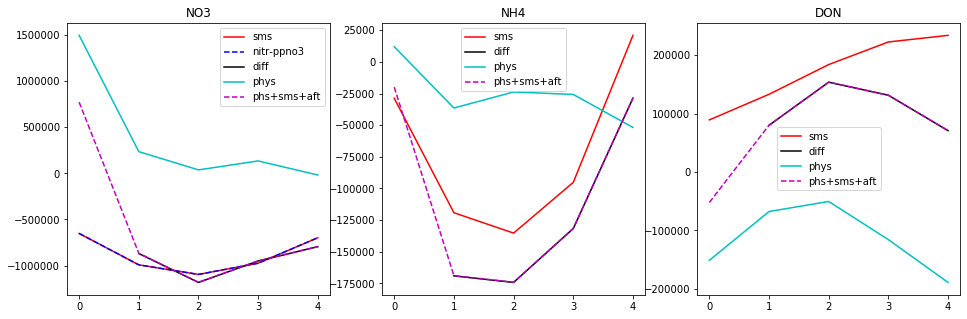

In [46]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(0,5),smsSumNO3,'r-',label='sms')
ax[0].plot(range(0,5),nitrSum-PPNO3Sum,'b--',label='nitr-ppno3')
ax[0].plot(range(1,5),no3diff,'k-',label='diff')
ax[0].plot(range(0,5),phsSumNO3,'c-',label='phys')
ax[0].plot(range(0,5),phsSumNO3+smsSumNO3+afiltSumNO3,'m--',label='phs+sms+aft')
ax[0].legend()
ax[0].set_title('NO3')
ax[1].plot(range(0,5),smsSumNH4,'r-',label='sms')
ax[1].plot(range(1,5),nh4diff,'k-',label='diff')
ax[1].plot(range(0,5),phsSumNH4,'c-',label='phys')
ax[1].plot(range(0,5),phsSumNH4+smsSumNH4+afiltSumNH4,'m--',label='phs+sms+aft')
ax[1].legend()
ax[1].set_title('NH4')
ax[2].plot(range(0,5),smsSumDON,'r-',label='sms')
ax[2].plot(range(1,5),dondiff,'k-',label='diff')
ax[2].plot(range(0,5),phsSumDON,'c-',label='phys')
ax[2].plot(range(0,5),phsSumDON+smsSumDON+afiltSumDON,'m--',label='phs+sms+aft')
ax[2].legend()
ax[2].set_title('DON')

In [47]:
bfxSumPON

masked_array(data=[-279679.35022347, -277813.1531561 , -288172.04374198,
                   -298782.66516396, -308235.98579204],
             mask=False,
       fill_value=1e+20)

In [48]:
afiltSumPON

array([ -604.2715,  4801.708 ,  9623.818 , 13123.984 , 13034.92  ],
      dtype=float32)

Text(0.5, 1.0, 'Liv')

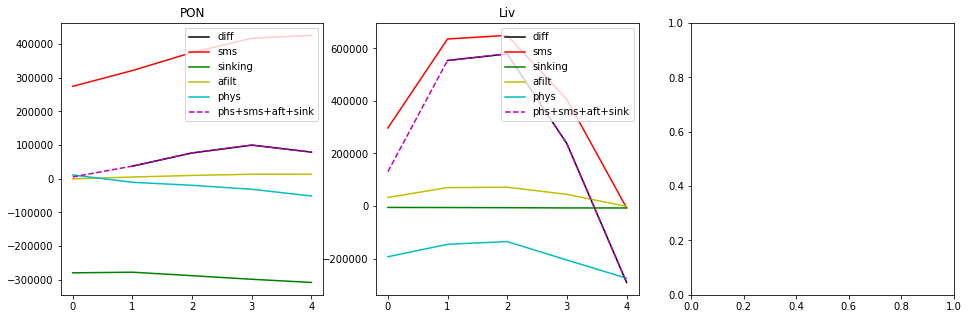

In [49]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,5),pondiff,'k-',label='diff')
ax[0].plot(range(0,5),smsSumPON,'r-',label='sms')
ax[0].plot(range(0,5),bfxSumPON,'g-',label='sinking')
ax[0].plot(range(0,5),afiltSumPON,'y-',label='afilt')
ax[0].plot(range(0,5),phsSumPON,'c-',label='phys')
ax[0].plot(range(0,5),phsSumPON+smsSumPON+afiltSumPON+bfxSumPON,'m--',label='phs+sms+aft+sink')
ax[0].legend()
ax[0].set_title('PON')
ax[1].plot(range(1,5),livdiff,'k-',label='diff')
ax[1].plot(range(0,5),smsSumLiv,'r-',label='sms')
ax[1].plot(range(0,5),bfxSumDIAT,'g-',label='sinking')
ax[1].plot(range(0,5),afiltSumLiv,'y-',label='afilt')
ax[1].plot(range(0,5),phsSumLiv,'c-',label='phys')
ax[1].plot(range(0,5),phsSumLiv+smsSumLiv+afiltSumLiv+bfxSumDIAT,'m--',label='phs+sms+aft+sink')
ax[1].legend()
ax[1].set_title('Liv')

In [50]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Malaspina_U*.nc')[0]) as f:
    checkallSlice(f)
    malUA=np.sum(np.sum(f.variables['ATX_NO3'][:,:,:,0],2),1)
    malUD=np.sum(np.sum(f.variables['DTX_NO3'][:,:,:,0],2),1)
    malUANH4=np.sum(np.sum(f.variables['ATX_NH4'][:,:,:,0],2),1)
    malUDNH4=np.sum(np.sum(f.variables['DTX_NH4'][:,:,:,0],2),1)
    malUADON=np.sum(np.sum(f.variables['ATX_DON'][:,:,:,0],2),1)
    malUDDON=np.sum(np.sum(f.variables['DTX_DON'][:,:,:,0],2),1)
    malUAPON=np.sum(np.sum(f.variables['ATX_PON'][:,:,:,0],2),1)
    malUDPON=np.sum(np.sum(f.variables['DTX_PON'][:,:,:,0],2),1)
    malUALIV=np.sum(np.sum(f.variables['ATX_LIV'][:,:,:,0],2),1)
    malUDLIV=np.sum(np.sum(f.variables['DTX_LIV'][:,:,:,0],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthu', 'depthu_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATX_NO3', 'ATX_NH4', 'ATX_PON', 'ATX_DON', 'ATX_LIV', 'DTX_NO3', 'DTX_NH4', 'DTX_PON', 'DTX_DON', 'DTX_LIV'])
Min/Max:
ATX_NO3 : -20620.053 16702.318
ATX_NH4 : -1436.9988 956.4073
ATX_PON : -524.6324 356.74042
ATX_DON : -406.79016 490.4865
ATX_LIV : -364.35873 429.49396
DTX_NO3 : -6.2845135 7.2077847
DTX_NH4 : -0.46717674 0.9382514
DTX_PON : -1.3053434 2.3314443
DTX_DON : -1.2817363 0.9350822
DTX_LIV : -0.6382442 0.68596554


In [51]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Haro_V*.nc')[0]) as f:
    checkallSlice(f)
    print(f.variables.keys())
    harVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    harVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    harVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    harVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    harVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    harVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    harVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    harVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    harVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    harVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NO3', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -14609.383 50899.62
ATY_NH4 : -1185.7266 4010.3992
ATY_PON : -466.65506 1534.0591
ATY_DON : -808.43146 1926.2667
ATY_LIV : -1300.7272 2790.4268
DTY_NO3 : -8.056589 13.097429
DTY_NH4 : -0.6906852 0.3428636
DTY_PON : -0.43672824 0.143884
DTY_DON : -1.8526769 1.1275673
DTY_LIV : -2.8802512 1.8330832
dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NO3', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])


In [52]:
harVANH4

masked_array(data=[  2502.5283, -30332.809 , -11727.422 ,   2639.3433,
                   -10293.66  ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [53]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_SJC_V*.nc')[0]) as f:
    checkallSlice(f)
    sjcVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sjcVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    sjcVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    sjcVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    sjcVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    sjcVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    sjcVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    sjcVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    sjcVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    sjcVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NO3', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -25682.996 29626.793
ATY_NH4 : -3375.236 3327.7686
ATY_PON : -1420.8391 1322.3384
ATY_DON : -2939.1382 2604.3923
ATY_LIV : -4282.3926 3941.4795
DTY_NO3 : -2.5131137 7.0306387
DTY_NH4 : -0.46537885 0.1133471
DTY_PON : -0.4009406 0.1353905
DTY_DON : -1.0228279 0.23551297
DTY_LIV : -1.2424817 2.4039319


In [54]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Rosario_V*.nc')[0]) as f:
    checkallSlice(f)
    rosVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    rosVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    rosVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    rosVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    rosVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    rosVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    rosVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    rosVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    rosVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    rosVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NO3', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -16710.713 9320.193
ATY_NH4 : -2343.0662 974.3436
ATY_PON : -1089.996 344.63586
ATY_DON : -1786.2677 398.23322
ATY_LIV : -2293.9727 479.02823
DTY_NO3 : -2.03051 10.80678
DTY_NH4 : -0.07514252 0.48349088
DTY_PON : -0.5077444 0.26418388
DTY_DON : -2.0219853 0.33012414
DTY_LIV : -3.1738129 0.35420597


In [55]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0]) as f:
    checkallSlice(f)
    sutVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    sutVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    sutVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    sutVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    sutVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    sutVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    sutVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    sutVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    sutVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    sutVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NO3', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -24461.49 13083.337
ATY_NH4 : -1965.3625 717.6238
ATY_PON : -742.6503 242.28075
ATY_DON : -599.133 387.67822
ATY_LIV : -605.3478 397.48752
DTY_NO3 : -5.9147077 7.3683767
DTY_NH4 : -0.60291 0.6266706
DTY_PON : -1.531273 0.5869577
DTY_DON : -1.2547671 0.89580214
DTY_LIV : -0.7694003 0.57838416


In [56]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Discovery_V*.nc')[0]) as f:
    checkallSlice(f)
    disVA=np.sum(np.sum(f.variables['ATY_NO3'][:,:,0,:],2),1)
    disVD=np.sum(np.sum(f.variables['DTY_NO3'][:,:,0,:],2),1)
    disVANH4=np.sum(np.sum(f.variables['ATY_NH4'][:,:,0,:],2),1)
    disVDNH4=np.sum(np.sum(f.variables['DTY_NH4'][:,:,0,:],2),1)
    disVADON=np.sum(np.sum(f.variables['ATY_DON'][:,:,0,:],2),1)
    disVDDON=np.sum(np.sum(f.variables['DTY_DON'][:,:,0,:],2),1)
    disVAPON=np.sum(np.sum(f.variables['ATY_PON'][:,:,0,:],2),1)
    disVDPON=np.sum(np.sum(f.variables['DTY_PON'][:,:,0,:],2),1)
    disVALIV=np.sum(np.sum(f.variables['ATY_LIV'][:,:,0,:],2),1)
    disVDLIV=np.sum(np.sum(f.variables['DTY_LIV'][:,:,0,:],2),1)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATY_NO3', 'ATY_NH4', 'ATY_PON', 'ATY_DON', 'ATY_LIV', 'DTY_NO3', 'DTY_NH4', 'DTY_PON', 'DTY_DON', 'DTY_LIV'])
Min/Max:
ATY_NO3 : -8765.547 14288.23
ATY_NH4 : -2551.6804 1459.4979
ATY_PON : -871.7454 476.5723
ATY_DON : -3321.742 967.60406
ATY_LIV : -3485.9248 1043.0941
DTY_NO3 : -1.7583499 15.051328
DTY_NH4 : -0.42129722 0.0602037
DTY_PON : -0.21968834 0.085935056
DTY_DON : -1.9486392 0.28057215
DTY_LIV : -1.9064204 0.30365965


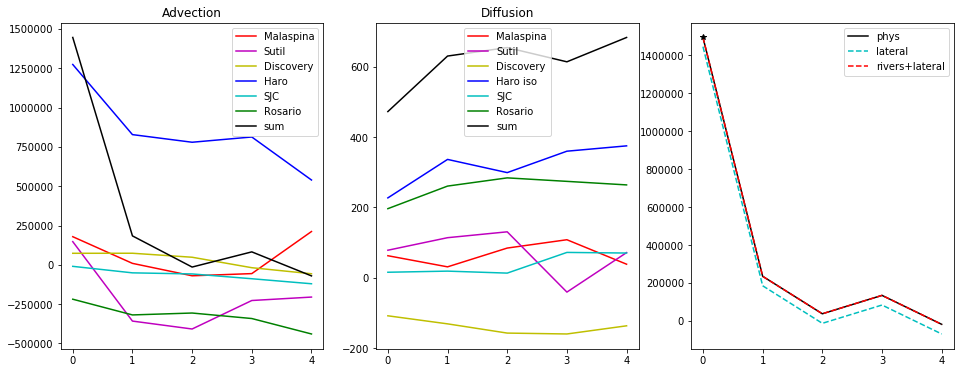

In [57]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUA,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVA,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVA,'y-',label='Discovery')
ax[0].plot(range(0,5),harVA,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVA,'c-',label='SJC')
ax[0].plot(range(0,5),rosVA,'g-',label='Rosario')
adv=harVA+sjcVA+rosVA-disVA-sutVA-malUA
ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUD,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVD,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVD,'y-',label='Discovery')
ax[1].plot(range(0,5),harVD,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVD,'c-',label='SJC')
ax[1].plot(range(0,5),rosVD,'g-',label='Rosario')
dif=harVD+sjcVD+rosVD-disVD-sutVD-malUD
ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumNO3,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif+rivSumNO3,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0]+rivSumNO3[0],'k*')
ax[2].legend()

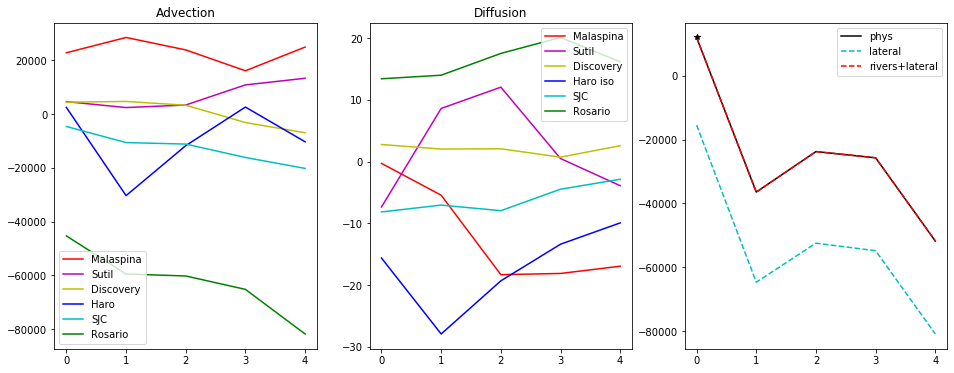

In [58]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUANH4,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVANH4,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVANH4,'y-',label='Discovery')
ax[0].plot(range(0,5),harVANH4,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVANH4,'c-',label='SJC')
ax[0].plot(range(0,5),rosVANH4,'g-',label='Rosario')
adv=harVANH4+sjcVANH4+rosVANH4-disVANH4-sutVANH4-malUANH4
#ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUDNH4,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVDNH4,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVDNH4,'y-',label='Discovery')
ax[1].plot(range(0,5),harVDNH4,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVDNH4,'c-',label='SJC')
ax[1].plot(range(0,5),rosVDNH4,'g-',label='Rosario')
dif=harVDNH4+sjcVDNH4+rosVDNH4-disVDNH4-sutVDNH4-malUDNH4
#ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumNH4,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif+rivSumNH4,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0]+rivSumNH4[0],'k*')
ax[2].legend()

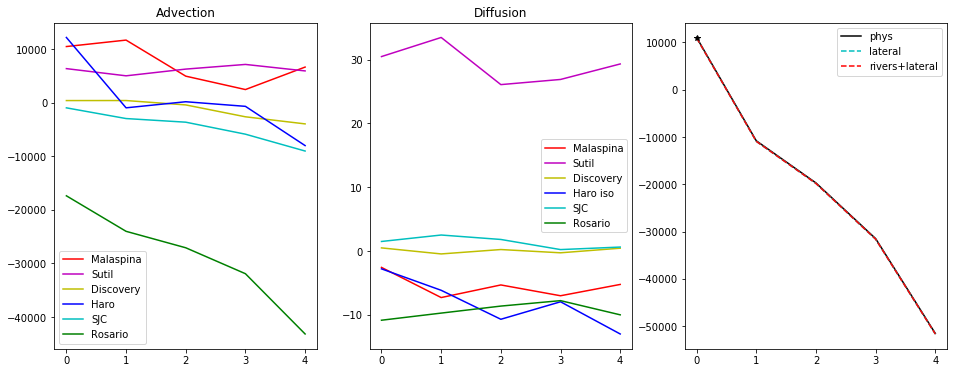

In [59]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUAPON,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVAPON,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVAPON,'y-',label='Discovery')
ax[0].plot(range(0,5),harVAPON,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVAPON,'c-',label='SJC')
ax[0].plot(range(0,5),rosVAPON,'g-',label='Rosario')
adv=harVAPON+sjcVAPON+rosVAPON-disVAPON-sutVAPON-malUAPON
#ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUDPON,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVDPON,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVDPON,'y-',label='Discovery')
ax[1].plot(range(0,5),harVDPON,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVDPON,'c-',label='SJC')
ax[1].plot(range(0,5),rosVDPON,'g-',label='Rosario')
dif=harVDPON+sjcVDPON+rosVDPON-disVDPON-sutVDPON-malUDPON
#ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumPON,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0],'k*')
ax[2].legend()

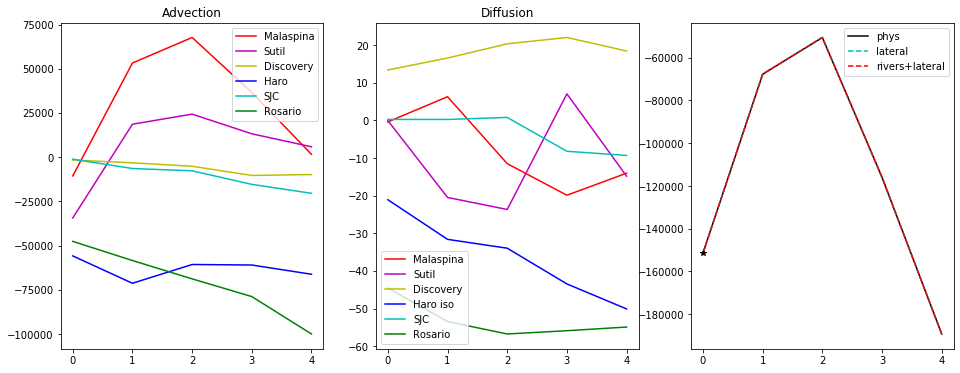

In [60]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUADON,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVADON,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVADON,'y-',label='Discovery')
ax[0].plot(range(0,5),harVADON,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVADON,'c-',label='SJC')
ax[0].plot(range(0,5),rosVADON,'g-',label='Rosario')
adv=harVADON+sjcVADON+rosVADON-disVADON-sutVADON-malUADON
#ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUDDON,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVDDON,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVDDON,'y-',label='Discovery')
ax[1].plot(range(0,5),harVDDON,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVDDON,'c-',label='SJC')
ax[1].plot(range(0,5),rosVDDON,'g-',label='Rosario')
dif=harVDDON+sjcVDDON+rosVDDON-disVDDON-sutVDDON-malUDDON
#ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumDON,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0],'k*')
ax[2].legend()

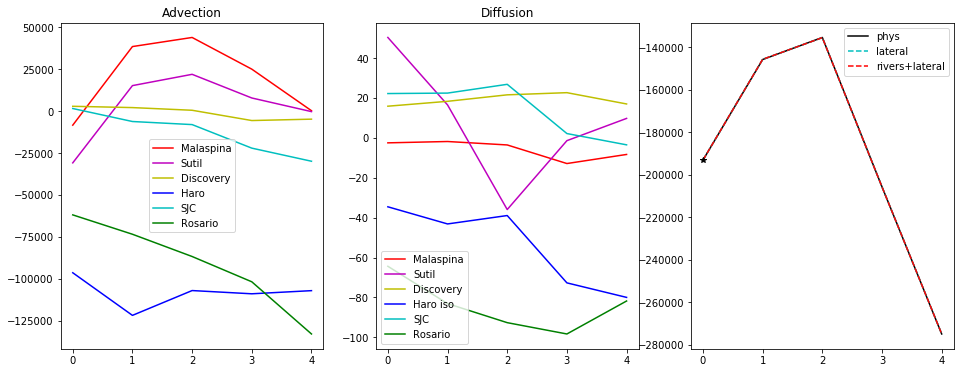

In [61]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUALIV,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVALIV,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVALIV,'y-',label='Discovery')
ax[0].plot(range(0,5),harVALIV,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVALIV,'c-',label='SJC')
ax[0].plot(range(0,5),rosVALIV,'g-',label='Rosario')
adv=harVALIV+sjcVALIV+rosVALIV-disVALIV-sutVALIV-malUALIV
#ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUDLIV,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVDLIV,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVDLIV,'y-',label='Discovery')
ax[1].plot(range(0,5),harVDLIV,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVDLIV,'c-',label='SJC')
ax[1].plot(range(0,5),rosVDLIV,'g-',label='Rosario')
dif=harVDLIV+sjcVDLIV+rosVDLIV-disVDLIV-sutVDLIV-malUDLIV
#ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),phsSumLiv,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0],'k*')
ax[2].legend()

In [62]:
fW=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_layer6m_W_20150501-20150505.nc')
fW2=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_layer6m_W_2_20150501-20150505.nc')

In [63]:
checkallSlice(fW)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'layer6m_W', 'layer6m_W_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'VMIXNO3', 'VMIXNH4', 'VMIXPON', 'VMIXDON', 'VMIXLIV', 'ATZ_NO3', 'ATZ_NH4', 'ATZ_PON', 'ATZ_DON', 'ATZ_LIV'])
Min/Max:
VMIXNO3 : -0.00094980956 0.20828193
VMIXNH4 : -0.00070263323 0.013399537
VMIXPON : -0.00020738435 0.001192946
VMIXDON : -0.0073279995 0.00022627169
VMIXLIV : -0.007922082 0.00053780724
ATZ_NO3 : -21713.508 43638.938
ATZ_NH4 : -7329.916 5304.6113
ATZ_PON : -677.748 1772.9548
ATZ_DON : -1935.8949 4435.0503
ATZ_LIV : -3049.033 6817.5396


In [64]:
checkallSlice(fW2)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'layer6m_W', 'layer6m_W_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'WLDFNO3', 'WLDFNH4', 'WLDFPON', 'WLDFDON', 'WLDFLIV', 'BSZ_DIAT', 'BSZ_PON', 'VMIXNO3H'])
Min/Max:
WLDFNO3 : -0.24012075 0.23907371
WLDFNH4 : -1.195509 1.1748327
WLDFPON : -0.89171064 0.98042065
WLDFDON : -2.5879364 2.564529
WLDFLIV : -7.150441 7.0797257
BSZ_DIAT : -7.1822644e-05 0.0
BSZ_PON : -0.00022927183 0.0
VMIXNO3H : -4.3895884e-08 7.7462206e-09


In [65]:
fr=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_rad_T_20150501-20150505.nc')

In [66]:
checkallSlice(fr)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'RDB_NO3', 'RDB_NH4', 'RDB_DON', 'RDB_PON', 'RDB_LIV', 'RDN_NO3', 'RDN_NH4', 'RDN_DON', 'RDN_PON', 'RDN_LIV'])
Min/Max:
RDB_NO3 : 0.0 0.0
RDB_NH4 : 0.0 0.0
RDB_DON : 0.0 0.005025891
RDB_PON : 0.0 0.0
RDB_LIV : 0.0 0.014756731
RDN_NO3 : 0.0 0.107609935
RDN_NH4 : 0.0 0.42198795
RDN_DON : 0.0 0.050665062
RDN_PON : 0.0 0.0
RDN_LIV : 0.0 0.18607815
